### RFM 분석 실습
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명
- InvoiceDate: 거래날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [682]:
import pandas as pd
import numpy as np

ci_df = pd.read_csv("./datasets/customer_invoice_data.csv")
display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [683]:
ci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [684]:
# 결측치 발견

In [685]:
ci_df_a = ci_df[['StockCode','Quantity','InvoiceDate','UnitPrice','CustomerID']]
ci_df_a

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
0,85123A,6,12/1/2010 8:26,2.55,17850.0
1,71053,6,12/1/2010 8:26,3.39,17850.0
2,84406B,8,12/1/2010 8:26,2.75,17850.0
3,84029G,6,12/1/2010 8:26,3.39,17850.0
4,84029E,6,12/1/2010 8:26,3.39,17850.0
...,...,...,...,...,...
541904,22613,12,12/9/2011 12:50,0.85,12680.0
541905,22899,6,12/9/2011 12:50,2.10,12680.0
541906,23254,4,12/9/2011 12:50,4.15,12680.0
541907,23255,4,12/9/2011 12:50,4.15,12680.0


In [686]:
ci_df_a.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


전체 데이터 개수 = 541909, 결측치 = 135080

In [687]:
135080 / 541909 * 100

24.926694334288598

결측치가 약 25% 차지.

In [688]:
ci_df['CustomerID'].value_counts(ascending=False)

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

결측데이터의 종류
- 완전 무작위 결측(MCAR)
> 어떤 변수상에서 결측 데이터가 관측된 혹은 관측되지 않는 다른 변수와 아무런 연관이 없는 경우
- 무작위 결측(MAR)
> 변수상의 결측 데이터가 관측된 다른 변수와 연관되어 있지만 그 자체가 비관측값들과는 연관되지 않는 경우
- 비 무작위 결측(NMAR)
> 어떤 변수의 결측 데이터가 MCAR 또는 MAR이 아닌 결측 데이터, 결측이 다른 변수와 연관이 있는 경우


결측값 유형의 분석 및 대치
- 결측치가 어떤 유형으로 분류되는지 분석된 결과에 따라 결측치 처리 방법의 선택 필요
- 일반적으로 결측/무응답을 가진 자료를 분석할 때는 MCAR 처리
- 불완전한 자료는 무시하고 완전히 관측된 자료만을 표준적 분석 시행

결측값 대치
- 단순 대치법
> 결측치에 대해 MCAR 또는 MAR로 판단하고 이에 대해 처리

> 완전 분석
>> 불완전한 자료는 완전하게 무시하고 분석 수행
>> 분석의 용이성 보장
>> 효율성 상실과 통계적 추론의 타당성에 문제 발생 가능성 존재

> 평균 대치법
>> 관측 또는 실험으로 얻어진 데이터의 평균을 결측치에 대치해서 사용
>> 효율성 향상
>> 통계량의 표준오차가 과소 추정되는 문제 발생 가능성 존재

> 회귀 대치법
>> 회귀분석에 의한 예측치를 결측치에 대치해서 사용
>> 조건부 평균 대치법이라고도 부름

> 단순확률 대치법
>> 평균 대치법에서 추정량 표준 오차의 과소 추정을 보완하는 대치법
>> 확률추출에 의해 전체 데이터 중 무작위로 대치하는 방법

> 최근접 대치법
>> 전체표본을 몇 개의 대체군으로 분류하여 각 층에서의 응답자료를 순서대로 정리
>> 정리된 자료에서 결측값 바로 이전의 응답을 결측치로 대치해서 사용



위 조사를 바탕으로, 생각해본 결과, CustomerID의 결측치는 MCAR로 판단.  
또한, 소비자 아이디는 해당 데이터셋에서 무시해도 되는 feature로 판단

In [689]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


이상치 확인

In [690]:
ci_df['InvoiceNo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: InvoiceNo
Non-Null Count   Dtype 
--------------   ----- 
541909 non-null  object
dtypes: object(1)
memory usage: 4.1+ MB


In [691]:
print(ci_df['InvoiceNo'].value_counts().index.tolist())

['573585', '581219', '581492', '580729', '558475', '579777', '581217', '537434', '580730', '538071', '580367', '580115', '581439', '580983', '578344', '538349', '578347', '537638', '537237', '536876', '576617', '536592', '537823', '576837', '579508', '577078', '537240', '577358', '576618', '576840', '576339', '579187', '537666', '538177', '579196', '580727', '536544', '578844', '575930', '577768', '578827', '576329', '575176', '539437', '575477', '539958', '579512', '575875', '540551', '578065', '538524', '559055', '578067', '575739', '538566', '559052', '539434', '540848', '539453', '541421', '560772', '560434', '539451', '578270', '560926', '539436', '573576', '559816', '541827', '574950', '567656', '540977', '574076', '574298', '541592', '575177', '540026', '540821', '574074', '541695', '541423', '567183', '558614', '541219', '560225', '541422', '575607', '541696', '571441', '541104', '559693', '541424', '570488', '562955', '540418', '572552', '540646', '574561', '540995', '559338',

C로 시작하는 데이터를 확인

In [692]:
c_invoices = ci_df[ci_df['InvoiceNo'].str.startswith('C')]
c_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [693]:
c_invoices[c_invoices['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [694]:
ci_df_minus = ci_df[ci_df['Quantity']<0]
ci_df_minus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


확인 결과, C로 시작하는 InvoiceNo 는 환불을 의미한다는 것을 확인.  
하지만 전체 데이터에서 Quantity<0(환불)값은 10624개인데, C의 개수는 9288개임을 확인.  

따라서, Quantity<0인 데이터프레임을 ci_df_minus, C로시작하는 데이터프레임을 c_invoices로 두어 중복된 항을 제거 

In [695]:
combined_df = pd.concat([ci_df_minus,c_invoices])
result_df = combined_df.drop_duplicates(keep=False)
display(result_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [696]:
result_df[result_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [697]:
result_df[result_df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


In [698]:
result_df[result_df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,12/1/2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,12/3/2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,12/3/2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom


확인결과, 중복된 항을 제거해도 Quantity값은 0보다 작은 데이터임을 확인했고, UnitPrice값도 0이고 CustomerID 또한 NaN임을 확인했다.  
따라서, Description의 항목을 확인해서 제거하면 위의 UnitPrice나 CustomerID 항목도 제거될 수 있기에 다음 과정을 진행했다.

In [699]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [700]:
ci_df[ci_df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [701]:
ci_df[ci_df['Description'].isna()]['UnitPrice'].sum()

0.0

Description이 NaN인 데이터의 가격 합은 0인것을 확인, 이 데이터들은 제거

In [702]:
ci_df = ci_df[~ci_df['Description'].isna()]

In [703]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Quantity = 0, NaN 값 확인

In [704]:
ci_df[ci_df['Quantity'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [705]:
ci_df[ci_df['Quantity']== 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


없는 것을 확인

InvoiceDate 값 확인

In [706]:
ci_df[ci_df['InvoiceDate'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [707]:
ci_df[ci_df['InvoiceDate']== 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


UnitPrice 확인

In [708]:
ci_df[ci_df['UnitPrice'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [709]:
ci_df[ci_df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,12/3/2010 12:08,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,12/3/2010 12:08,0.0,NaN,United Kingdom
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom


In [710]:
ci_df[ci_df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


위 데이터는 회사에서 회계처리조정된 값으로, 이 데이터는 제거

In [711]:
ci_df = ci_df[ci_df['UnitPrice']>=0]

In [712]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


데이터 전처리 중 Description 부분에서 의미를 알 수 없는 설명이 있는 것을 확인  
그에 따라 다시 Description을 확인

In [713]:
print(ci_df['Description'][ci_df['Description'].duplicated()].value_counts().index.tolist())

['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER', 'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'LUNCH BAG RED RETROSPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'PACK OF 72 RETROSPOT CAKE CASES', 'LUNCH BAG  BLACK SKULL.', 'NATURAL SLATE HEART CHALKBOARD ', 'POSTAGE', 'JUMBO BAG PINK POLKADOT', 'HEART OF WICKER SMALL', 'JAM MAKING SET WITH JARS', 'JUMBO STORAGE BAG SUKI', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'JUMBO SHOPPER VINTAGE RED PAISLEY', 'LUNCH BAG CARS BLUE', 'LUNCH BAG SPACEBOY DESIGN ', 'JAM MAKING SET PRINTED', 'RECIPE BOX PANTRY YELLOW DESIGN', 'SPOTTY BUNTING', 'LUNCH BAG SUKI DESIGN ', 'ROSES REGENCY TEACUP AND SAUCER ', 'LUNCH BAG PINK POLKADOT', 'WOODEN PICTURE FRAME WHITE FINISH', 'SET OF 4 PANTRY JELLY MOULDS', 'ALARM CLOCK BAKELIKE RED ', 'GREEN REGENCY TEACUP AND SAUCER', 'LUNCH BAG APPLE DESIGN', 'VICTORIAN GLASS HANGING T-LIGHT', 'RED RETROSPOT CHARLOTTE BAG', 'LUNCH BAG WOODLAND', 'RABBIT NIGHT LIGHT', 'ALARM CLOCK BAK

'sold as 1', 'crushed', '?missing', 'counted', 'stock check'

Description이 ? 인 데이터는 삭제

In [714]:
ci_df= ci_df[~(ci_df['Description'] == '?')]

In [715]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [716]:
ci_df[ci_df['Description']=='check']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,NaN,United Kingdom
13218,537426,84968E,check,-35,12/6/2010 15:36,0.0,NaN,United Kingdom
108577,545546,84249A,check,-150,3/3/2011 15:03,0.0,NaN,United Kingdom
113580,545990,84598,check,-3000,3/8/2011 13:07,0.0,NaN,United Kingdom
381676,569875,90195A,check,-45,10/6/2011 15:07,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535325,581202,23404,check,41,12/7/2011 18:30,0.0,NaN,United Kingdom
535331,581208,72801C,check,-10,12/7/2011 18:35,0.0,NaN,United Kingdom
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,NaN,United Kingdom
535334,581211,22142,check,14,12/7/2011 18:36,0.0,NaN,United Kingdom


In [717]:
ci_df[(ci_df['Description'].str.len() <= 10) & (~ci_df['Description'].\
                                                isin(['POSTAGE', 'PHOTO CUBE', 'BINGO SET', 'SPACE OWL','CARRIAGE',\
                                                     'check', 'damaged', 'damages?', 'Damaged', 'Manual', 'Amazon',\
                                                     'SAMPLES','Discount','SPACE FROG','SOMBRERO','found','FOUND',\
                                                     'SOMBRERO', 'damages', 'CHECK','amazon','Damages','20713','??',\
                                                     'sombrero','SOMBRERO ','AMAZON FEE','faulty','Found','counted',\
                                                     'adjustment','Given away', 'Dotcom','missing','check?','dotcom',\
                                                     'showroom','MIA','Adjustment', 'Sale error','Dotcom set','broken',\
                                                     'wet pallet','found box','Damaged','WET/MOULDY','sold as 1','?missing',\
                                                     'throw away','test','mailout','?lost','cracked','mouldy']))].value_counts()
                                                     

Series([], Name: count, dtype: int64)

check, damaged, damages?, Damaged, Manual, Amazon, amazon, found, FOUND, damages, CHECK, Damages, 20713, ??, SOMBRERO ,  
AMAZON FEE, faulty, Found, counted, adjustment, Given away, Dotcom, missing, check?, dotcom, showroom, Crushed, MIA, Adjustment, Dotcom set, broken, wet pallet, found box, Damaged, WET/MOULDY, sold as 1, ?missing, throw away, test, mailout,
?lost, cracked, mouldy, Breakages, smashed, missing?, wet rusty, ???lost, John Lewis, ?? missing, ???missing, AMAZON, 
wet?, lost??, ???, wet, wet boxes, mixed up, lost, smashed, can't find, ebay, ?display?, Crushed

위 데이터 이름들은 Description에 해당되는 값들이지만, 이 값들 중 고객의 상품구매나 환불과 연관되어 있는 설명은 없는 것을 알 수 있다.  
- check와 연관된 이름들 : 수량 체크
- damage와 연관된 이름들 : 파손 물품
- Amazon와 연관된 이름들 : 아마존의 서비스 또는 기능과 연관
- wet과 연관된 이름들 : 젖은 제품
- rusty와 연관된 이름들 : 녹슨 제품
- lost와 연관된 이름들 : 손실 제품
- crush와 연관된 이름들 : 파손 제품

또한, 그 price도 0인것을 다 확인했다.  
결론 : 위 이름들에 해당되는 데이터또한 삭제해도 무방하다.

In [718]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [719]:
ci_df = ci_df[~ci_df['Description'].str.lower().isin(['check', 'damaged', 'manual',\
                                                      'amazon', 'found', 'damages',\
                                                      '20713', 'sombrero', 'amazon fee',\
                                                      'faulty', 'counted', 'adjustment',\
                                                      'given away', 'dotcom', 'missing',\
                                                      'showroom', 'crushed', 'mia',\
                                                      'dotcom set', 'broken', 'wet pallet',\
                                                      'found box', 'wet/mouldy', 'sold as 1',\
                                                      'throw away', 'test', 'mailout',\
                                                      'cracked', 'mouldy', 'breakages',\
                                                      'smashed', 'wet rusty', 'john lewis',\
                                                      'amazing', 'wet boxes', 'mixed up',\
                                                      "can't find", 'ebay', 'crushed'])]

In [720]:
ci_df['Description'].isin(['check', 'damaged', 'manual',\
                                                      'amazon', 'found', 'damages',\
                                                      '20713', 'sombrero', 'amazon fee',\
                                                      'faulty', 'counted', 'adjustment',\
                                                      'given away', 'dotcom', 'missing',\
                                                      'showroom', 'crushed', 'mia',\
                                                      'dotcom set', 'broken', 'wet pallet',\
                                                      'found box', 'wet/mouldy', 'sold as 1',\
                                                      'throw away', 'test', 'mailout',\
                                                      'cracked', 'mouldy', 'breakages',\
                                                      'smashed', 'wet rusty', 'john lewis',\
                                                      'amazing', 'wet boxes', 'mixed up',\
                                                      "can't find", 'ebay', 'crushed']).sum()

0

의미 없는 데이터들 삭제된것을 확인

In [721]:
display(ci_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [722]:
display(ci_df[ci_df['Quantity']<0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/9/2011 9:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


환불 데이터 부분은 따로 분리해서 데이터프레임으로 만들어 분석 진행

In [723]:
ci_df_refund = ci_df[ci_df['Quantity']<0]
ci_df_refund

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/9/2011 9:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [724]:
ci_df_pur = ci_df[~(ci_df['Quantity']<0)]
ci_df_pur

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


UnitPrice의 정상범위 확인

In [725]:
Q1 = ci_df_pur.describe().T.loc['UnitPrice', '25%']
Q3 = ci_df_pur.describe().T.loc['UnitPrice', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

정상치 범위: -3.0700000000000003 ~ 8.45


In [726]:
ci_df_pur[ci_df_pur['UnitPrice'] > upper_bound]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom
...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,12/9/2011 12:16,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,12/9/2011 12:16,11.95,12713.0,Germany
541831,581579,22941,CHRISTMAS LIGHTS 10 REINDEER,4,12/9/2011 12:19,8.50,17581.0,United Kingdom
541849,581580,22894,TABLECLOTH RED APPLES DESIGN,2,12/9/2011 12:20,9.95,12748.0,United Kingdom


In [727]:
ci_df_pur[ci_df_pur['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


정상치 범위를 벗어난 값 제거

In [728]:
ci_df_new = ci_df_pur[~(ci_df_pur['UnitPrice'] > upper_bound)]
display(ci_df_new)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [729]:
ci_df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,492349.0,11.182781,162.395123,1.0,1.00,4.00,12.00,80995.00
UnitPrice,492349.0,2.529981,1.914511,0.0,1.25,1.95,3.75,8.33
CustomerID,375017.0,15306.427989,1710.627054,12346.0,13975.00,15186.00,16807.00,18287.00


rfm 데이터프레임 생성

In [730]:
ci_df_fre = ci_df_new.groupby(['CustomerID'])['Quantity'].first().reset_index()
ci_df_fre

,CustomerID,Quantity
0,12346.0,74215
1,12347.0,12
2,12348.0,72
3,12349.0,2
4,12350.0,12
...,...,...
4307,18280.0,3
4308,18281.0,12
4309,18282.0,48
4310,18283.0,1


recency 

In [731]:
ci_df_new['InvoiceDate'] = pd.to_datetime(ci_df_new['InvoiceDate'])
ci_df_new

C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\2559765605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_df_new['InvoiceDate'] = pd.to_datetime(ci_df_new['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [732]:
ci_df_new['InvoiceDate'].sort_values(ascending=True)

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541896   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541900   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 492349, dtype: datetime64[ns]

날짜를 확인한 결과, 시간값은 불필요하다고 판단. 년 월 일만 따로 추출

In [733]:
ci_df_new['InvoiceDate'] = ci_df_new['InvoiceDate'].dt.strftime('%Y-%m-%d')
ci_df_new

C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\1015744683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ci_df_new['InvoiceDate'] = ci_df_new['InvoiceDate'].dt.strftime('%Y-%m-%d')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [734]:
ci_df_new[ci_df_new['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [735]:
ci_df_rec = ci_df_new.groupby(['CustomerID'])['InvoiceDate'].first().reset_index()
ci_df_rec

,CustomerID,InvoiceDate
0,12346.0,2011-01-18
1,12347.0,2010-12-07
2,12348.0,2010-12-16
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4307,18280.0,2011-03-07
4308,18281.0,2011-06-12
4309,18282.0,2011-08-05
4310,18283.0,2011-01-06


오늘 날짜(2011-12-09)로부터 지난 구매 날짜 구하기

In [736]:
ci_df_rec['InvoiceDate'] = pd.to_datetime(ci_df_rec['InvoiceDate']).apply(lambda x: (pd.to_datetime('2011-12-09') - x).days)
ci_df_rec

,CustomerID,InvoiceDate
0,12346.0,325
1,12347.0,367
2,12348.0,358
3,12349.0,18
4,12350.0,310
...,...,...
4307,18280.0,277
4308,18281.0,180
4309,18282.0,126
4310,18283.0,337


In [737]:
ci_df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [738]:
ci_df_new[ci_df_new['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [739]:
ci_df_mon = ci_df_new.groupby(['CustomerID'])['UnitPrice'].sum().reset_index()
ci_df_mon

,CustomerID,UnitPrice
0,12346.0,1.04
1,12347.0,410.31
2,12348.0,18.71
3,12349.0,203.25
4,12350.0,25.30
...,...,...
4307,18280.0,37.70
4308,18281.0,5.46
4309,18282.0,24.14
4310,18283.0,1172.08


In [740]:
ci_df_rfm = pd.merge(ci_df_rec, ci_df_fre, on='CustomerID')
ci_df_rfm.columns=['CustomerID','Recency','Frequency']
ci_df_rfm

,CustomerID,Recency,Frequency
0,12346.0,325,74215
1,12347.0,367,12
2,12348.0,358,72
3,12349.0,18,2
4,12350.0,310,12
...,...,...,...
4307,18280.0,277,3
4308,18281.0,180,12
4309,18282.0,126,48
4310,18283.0,337,1


In [741]:
ci_df_rfm = pd.merge(ci_df_rfm, ci_df_mon, on='CustomerID')
ci_df_rfm.columns=['CustomerID','Recency','Frequency','Monetary']
display(ci_df_rfm)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,74215,1.04
1,12347.0,367,12,410.31
2,12348.0,358,72,18.71
3,12349.0,18,2,203.25
4,12350.0,310,12,25.30
...,...,...,...,...
4307,18280.0,277,3,37.70
4308,18281.0,180,12,5.46
4309,18282.0,126,48,24.14
4310,18283.0,337,1,1172.08


In [742]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ci_df_rfm[['Recency','Frequency','Monetary']] = scaler.fit_transform(ci_df_rfm[['Recency','Frequency','Monetary']])
ci_df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,0.871314,1.000000,0.000064
1,12347.0,0.983914,0.000148,0.025177
2,12348.0,0.959786,0.000957,0.001148
3,12349.0,0.048257,0.000013,0.012472
4,12350.0,0.831099,0.000148,0.001552
...,...,...,...,...
4307,18280.0,0.742627,0.000027,0.002313
4308,18281.0,0.482574,0.000148,0.000335
4309,18282.0,0.337802,0.000633,0.001481
4310,18283.0,0.903485,0.000000,0.071920


In [743]:
ci_df_rfm['Recency'] = 1 - ci_df_rfm['Recency']
ci_df_rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,0.128686,1.000000,0.000064
1,12347.0,0.016086,0.000148,0.025177
2,12348.0,0.040214,0.000957,0.001148
3,12349.0,0.951743,0.000013,0.012472
4,12350.0,0.168901,0.000148,0.001552
...,...,...,...,...
4307,18280.0,0.257373,0.000027,0.002313
4308,18281.0,0.517426,0.000148,0.000335
4309,18282.0,0.662198,0.000633,0.001481
4310,18283.0,0.096515,0.000000,0.071920


In [744]:
ci_df_rfm['Score'] = ci_df_rfm[['Recency','Frequency','Monetary']].sum(axis=1)
ci_df_rfm

,CustomerID,Recency,Frequency,Monetary,Score
0,12346.0,0.128686,1.000000,0.000064,1.128750
1,12347.0,0.016086,0.000148,0.025177,0.041411
2,12348.0,0.040214,0.000957,0.001148,0.042319
3,12349.0,0.951743,0.000013,0.012472,0.964228
4,12350.0,0.168901,0.000148,0.001552,0.170601
...,...,...,...,...,...
4307,18280.0,0.257373,0.000027,0.002313,0.259713
4308,18281.0,0.517426,0.000148,0.000335,0.517910
4309,18282.0,0.662198,0.000633,0.001481,0.664313
4310,18283.0,0.096515,0.000000,0.071920,0.168435


In [745]:
ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [746]:
ci_df[ci_df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/9/2011 9:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [747]:
com_ci_df = pd.merge(ci_df, ci_df_rfm, on='CustomerID')
com_ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693
...,...,...,...,...,...,...,...,...,...,...,...,...
406218,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,1.0,0.000310,0.004000,1.004309
406219,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,1.0,0.000310,0.004000,1.004309
406220,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,1.0,0.000310,0.004000,1.004309
406221,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,1.0,0.000310,0.004000,1.004309


In [748]:
com_ci_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406223.0,12.074166,248.837263,-80995.000000,2.000000,5.000000,12.000000,80995.000000
UnitPrice,406223.0,3.078265,20.214151,0.000000,1.250000,1.950000,3.750000,8142.750000
CustomerID,406223.0,15287.598004,1713.451199,12346.000000,13954.000000,15152.000000,16791.000000,18287.000000
Recency,406223.0,0.246685,0.284460,0.000000,0.018767,0.131367,0.375335,1.000000
Frequency,406223.0,0.000203,0.002341,0.000000,0.000013,0.000067,0.000148,1.000000
Monetary,406223.0,0.089086,0.198819,0.000000,0.011591,0.026232,0.058122,1.000000
Score,406223.0,0.335975,0.321477,0.000967,0.084002,0.225576,0.495105,1.643268


In [749]:
l1, l2, l3 = np.percentile(com_ci_df['Score'], [30, 70, 95])
print(l1, l2, l3)

0.10748258131302718 0.393599983391356 0.9433312786113442


In [750]:
def get_level(x):
    if x <= l1:
        return 4
    if x <= l2:
        return 3
    if x <= l3:
        return 2
    return 1

In [751]:
com_ci_df['Level'] = com_ci_df['Score'].apply(get_level)
com_ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Score,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,4
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406218,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,1.0,0.000310,0.004000,1.004309,1
406219,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,1.0,0.000310,0.004000,1.004309,1
406220,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,1.0,0.000310,0.004000,1.004309,1
406221,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,1.0,0.000310,0.004000,1.004309,1


In [752]:
com_ci_df['Level'] = com_ci_df['Level'].replace([4,3,2,1], ['Bronze','Silver','Gold','Diamond'])
com_ci_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,Monetary,Score,Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,Bronze
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,Bronze
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,Bronze
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,Bronze
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,0.000067,0.054626,0.054693,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406218,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,1.0,0.000310,0.004000,1.004309,Diamond
406219,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,1.0,0.000310,0.004000,1.004309,Diamond
406220,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,1.0,0.000310,0.004000,1.004309,Diamond
406221,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,1.0,0.000310,0.004000,1.004309,Diamond


In [753]:
df = com_ci_df.groupby('CustomerID')[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','Country','Score','Level']].first().reset_index()
display(df) 

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,1.128750,Diamond
1,12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,0.041411,Bronze
2,12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,12/16/2010 19:09,0.55,Finland,0.042319,Bronze
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,11/21/2011 9:51,7.50,Italy,0.964228,Diamond
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2/2/2011 16:01,2.10,Norway,0.170601,Silver
...,...,...,...,...,...,...,...,...,...,...
4307,18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,3/7/2011 9:52,7.90,United Kingdom,0.259713,Silver
4308,18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,6/12/2011 10:53,0.42,United Kingdom,0.517910,Gold
4309,18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,8/5/2011 13:35,12.75,United Kingdom,0.664313,Gold
4310,18283.0,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,1/6/2011 14:14,0.85,United Kingdom,0.168435,Silver


In [754]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze','Silver','Gold','Diamond']

print(com_ci_df['Level'].value_counts())

Level
Silver     162393
Bronze     122046
Gold       101482
Diamond     20302
Name: count, dtype: int64


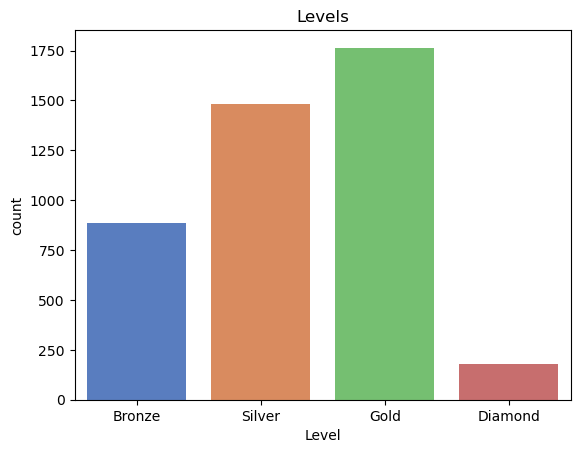

In [755]:
sns.countplot(x='Level', data=df, palette='muted', order=order)
plt.title('Levels')
plt.show()

In [756]:
df

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,1.128750,Diamond
1,12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,0.041411,Bronze
2,12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,12/16/2010 19:09,0.55,Finland,0.042319,Bronze
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,11/21/2011 9:51,7.50,Italy,0.964228,Diamond
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2/2/2011 16:01,2.10,Norway,0.170601,Silver
...,...,...,...,...,...,...,...,...,...,...
4307,18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,3/7/2011 9:52,7.90,United Kingdom,0.259713,Silver
4308,18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,6/12/2011 10:53,0.42,United Kingdom,0.517910,Gold
4309,18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,8/5/2011 13:35,12.75,United Kingdom,0.664313,Gold
4310,18283.0,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,1/6/2011 14:14,0.85,United Kingdom,0.168435,Silver


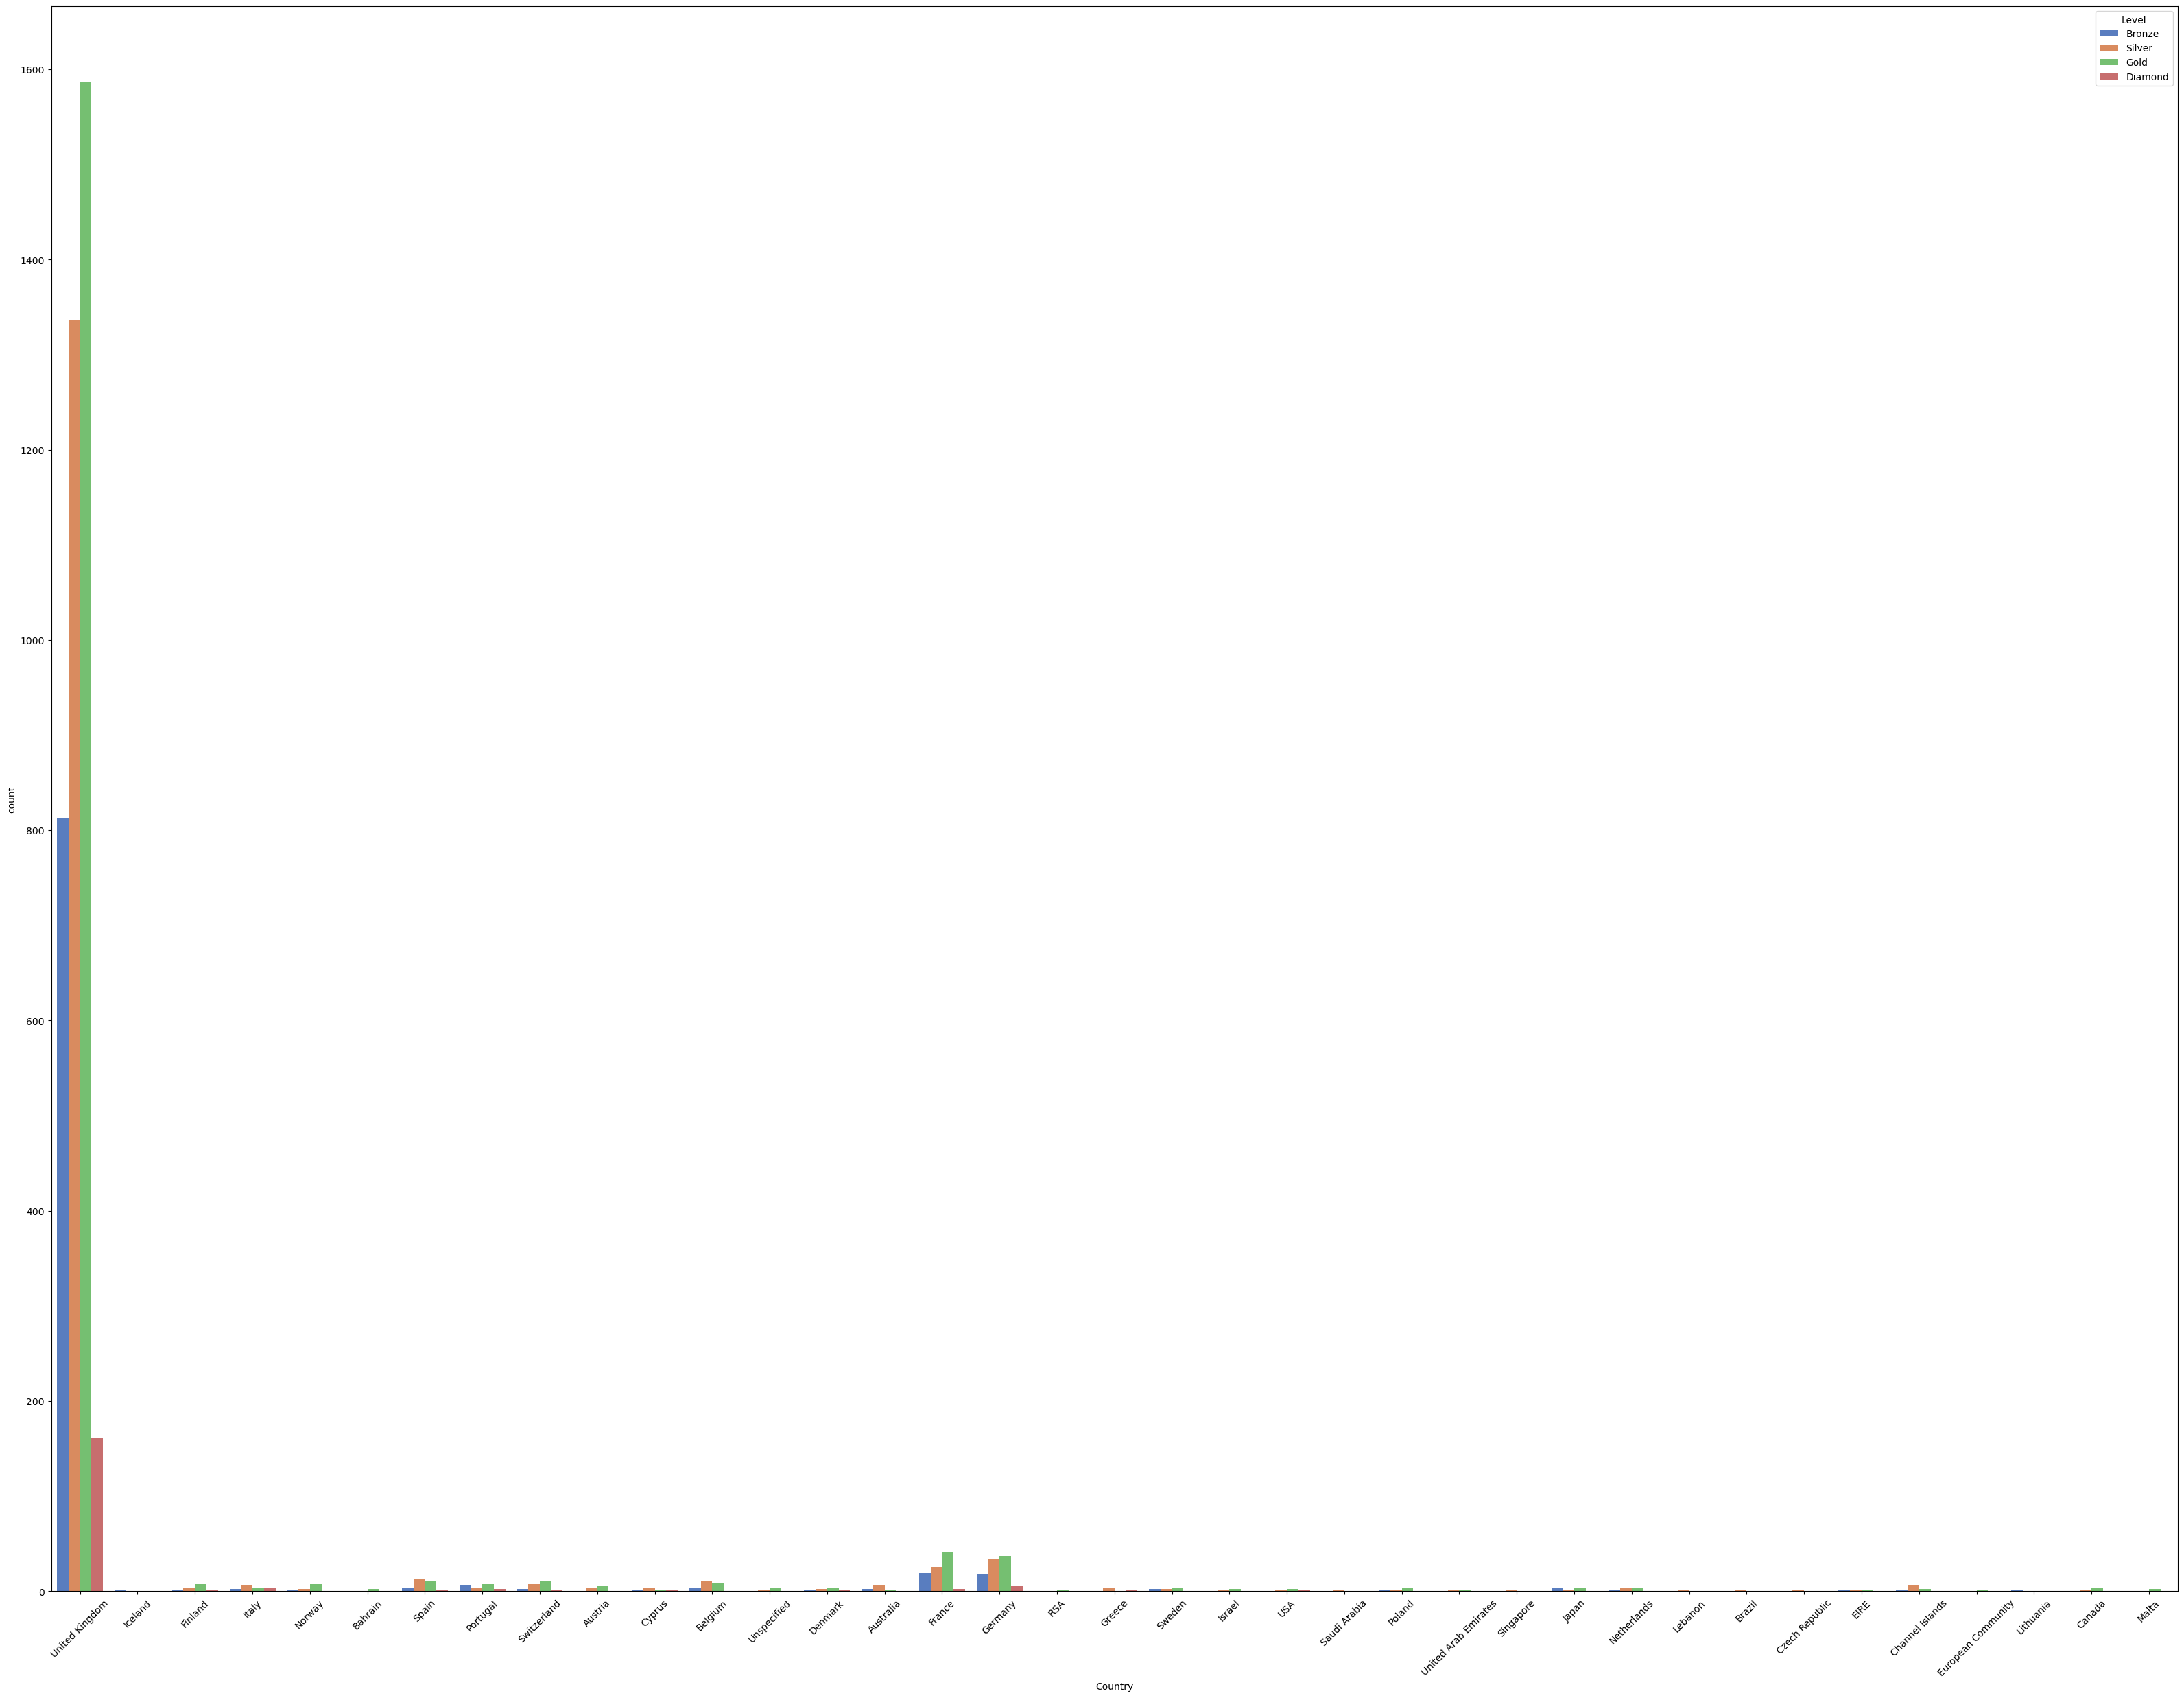

In [757]:
plt.figure(figsize = (40, 30))
sns.countplot(x='Country', hue='Level', data=df, palette='muted', hue_order=order)
plt.xticks(rotation=45)
plt.show()

영국 그룹화

In [758]:
df

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,1.128750,Diamond
1,12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,0.041411,Bronze
2,12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,12/16/2010 19:09,0.55,Finland,0.042319,Bronze
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,11/21/2011 9:51,7.50,Italy,0.964228,Diamond
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2/2/2011 16:01,2.10,Norway,0.170601,Silver
...,...,...,...,...,...,...,...,...,...,...
4307,18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,3/7/2011 9:52,7.90,United Kingdom,0.259713,Silver
4308,18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,6/12/2011 10:53,0.42,United Kingdom,0.517910,Gold
4309,18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,8/5/2011 13:35,12.75,United Kingdom,0.664313,Gold
4310,18283.0,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,1/6/2011 14:14,0.85,United Kingdom,0.168435,Silver


In [759]:
df[df['Quantity']<0]

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
72,12434.0,C538723,22333,RETROSPOT PARTY BAG + STICKER SET,-7,12/14/2010 11:12,1.65,Australia,0.313674,Silver
100,12471.0,C536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,12/2/2010 10:37,8.50,Germany,0.077426,Bronze
101,12472.0,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,Germany,0.045493,Bronze
103,12474.0,C537333,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-4,12/6/2010 12:00,8.50,Germany,0.160794,Silver
105,12476.0,C538642,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-1,12/13/2010 14:37,8.50,Germany,0.066146,Bronze
...,...,...,...,...,...,...,...,...,...,...
4228,18172.0,C544436,22556,PLASTERS IN TIN CIRCUS PARADE,-3,2/18/2011 16:52,1.65,United Kingdom,0.255335,Silver
4245,18193.0,C537821,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-3,12/8/2010 14:20,6.95,United Kingdom,0.559737,Gold
4269,18225.0,C536855,21527,RED RETROSPOT TRADITIONAL TEAPOT,-4,12/3/2010 10:11,7.95,United Kingdom,0.056259,Bronze
4274,18230.0,C538089,21906,PHARMACIE FIRST AID TIN,-1,12/9/2010 14:47,6.75,United Kingdom,0.202062,Silver


In [760]:
df_UK = df[df['Country'] == 'United Kingdom']
df_UK

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,1.128750,Diamond
324,12747.0,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,12/5/2010 15:38,2.55,United Kingdom,0.029096,Bronze
325,12748.0,536521,22854,CREAM SWEETHEART EGG HOLDER,1,12/1/2010 12:48,4.95,United Kingdom,0.552209,Gold
326,12749.0,552694,22768,FAMILY PHOTO FRAME CORNICE,2,5/10/2011 15:25,9.95,United Kingdom,0.462014,Gold
370,12820.0,541283,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,1/17/2011 12:34,0.55,United Kingdom,0.133211,Silver
...,...,...,...,...,...,...,...,...,...,...
4307,18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,3/7/2011 9:52,7.90,United Kingdom,0.259713,Silver
4308,18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,6/12/2011 10:53,0.42,United Kingdom,0.517910,Gold
4309,18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,8/5/2011 13:35,12.75,United Kingdom,0.664313,Gold
4310,18283.0,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,1/6/2011 14:14,0.85,United Kingdom,0.168435,Silver


In [761]:
print(df_UK['Level'].value_counts())

Level
Gold       1587
Silver     1336
Bronze      812
Diamond     161
Name: count, dtype: int64


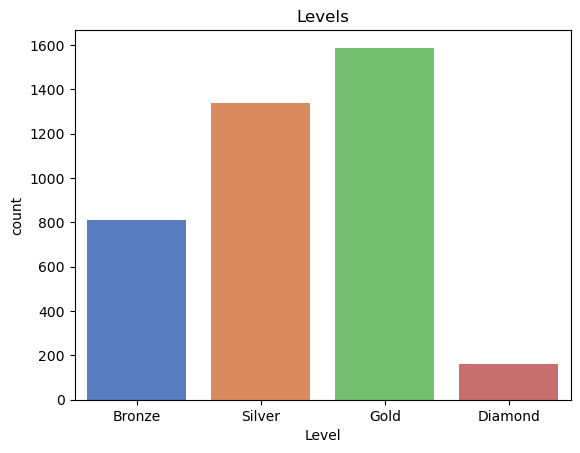

In [762]:
sns.countplot(x='Level', data=df_UK, palette='muted', order=order)
plt.title('Levels')
plt.show()

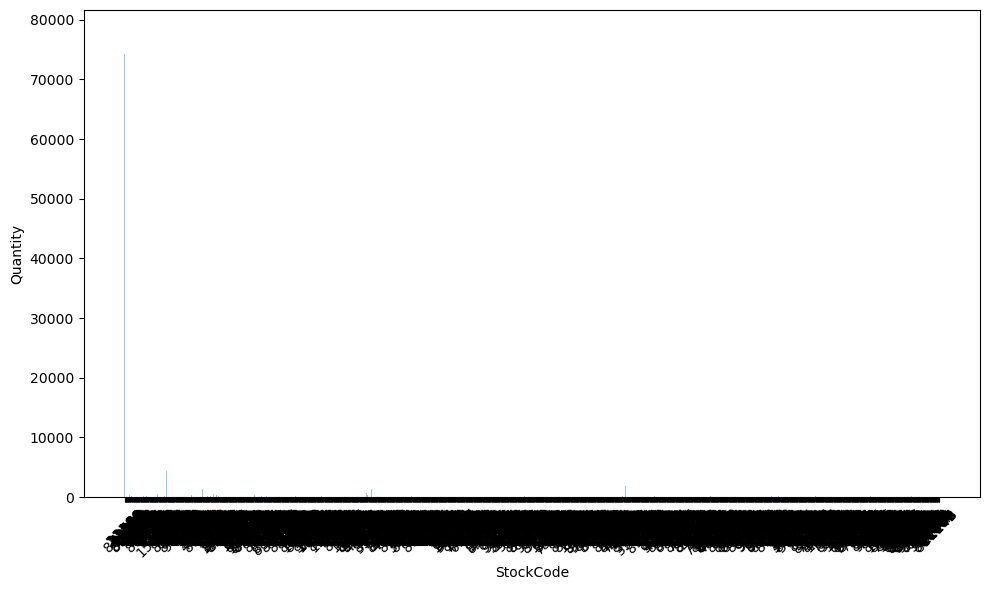

In [763]:
x_values = df_UK['StockCode']
y_values = df_UK['Quantity']
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

x축 값이 너무 많기에 가장 많이 구매한 항목 5개만 따로 추출

In [808]:
top_5_df_UK = df_UK[df_UK['StockCode'] != 'POST'][df_UK['StockCode'] != 'D'][df_UK['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_5_df_UK

C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\1508868425.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_UK = df_UK[df_UK['StockCode'] != 'POST'][df_UK['StockCode'] != 'D'][df_UK['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\1508868425.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_UK = df_UK[df_UK['StockCode'] != 'POST'][df_UK['StockCode'] != 'D'][df_UK['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)


StockCode
23166     74311
84826     12480
84077      5952
22197      4847
85123A     3241
18007      2400
16014      2000
84950      1824
22616      1806
84568      1728
Name: Quantity, dtype: int64

In [809]:
df_UK_top5 = df_UK[df_UK['StockCode'].isin(top_5_df_UK.index)]
df_UK_top5

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,1.128750,Diamond
410,12872.0,538086,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14,12/9/2010 14:44,2.95,United Kingdom,0.029726,Bronze
451,12931.0,539332,22197,SMALL POPCORN HOLDER,200,12/17/2010 9:45,0.72,United Kingdom,0.054139,Bronze
468,12953.0,579533,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,11/30/2011 9:24,2.95,United Kingdom,0.980502,Diamond
492,12991.0,563845,22197,POPCORN HOLDER,50,8/19/2011 14:39,0.85,United Kingdom,0.704780,Gold
...,...,...,...,...,...,...,...,...,...,...
4193,18122.0,559774,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,7/12/2011 11:37,2.95,United Kingdom,0.643883,Gold
4197,18127.0,561697,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,7/29/2011 10:06,2.95,United Kingdom,0.648171,Gold
4209,18146.0,551720,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,5/3/2011 16:35,2.95,United Kingdom,0.411452,Gold
4223,18167.0,564626,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,8/26/2011 11:40,2.95,United Kingdom,0.725966,Gold


In [766]:
df_UK_top5[df_UK_top5['StockCode'] == '84077']

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
740,13330.0,542429,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,1/28/2011 10:08,0.29,United Kingdom,0.162028,Silver
2001,15093.0,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,12/2/2010 18:25,0.21,United Kingdom,0.019694,Bronze
2907,16333.0,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2/3/2011 10:50,0.21,United Kingdom,0.209438,Silver
3030,16496.0,542272,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,1/27/2011 9:42,0.29,United Kingdom,0.166726,Silver
3127,16637.0,551352,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,4/28/2011 10:20,0.29,United Kingdom,0.403698,Gold
3214,16754.0,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,United Kingdom,0.041550,Bronze
3671,17400.0,539760,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,12/21/2010 17:16,0.29,United Kingdom,0.085989,Bronze


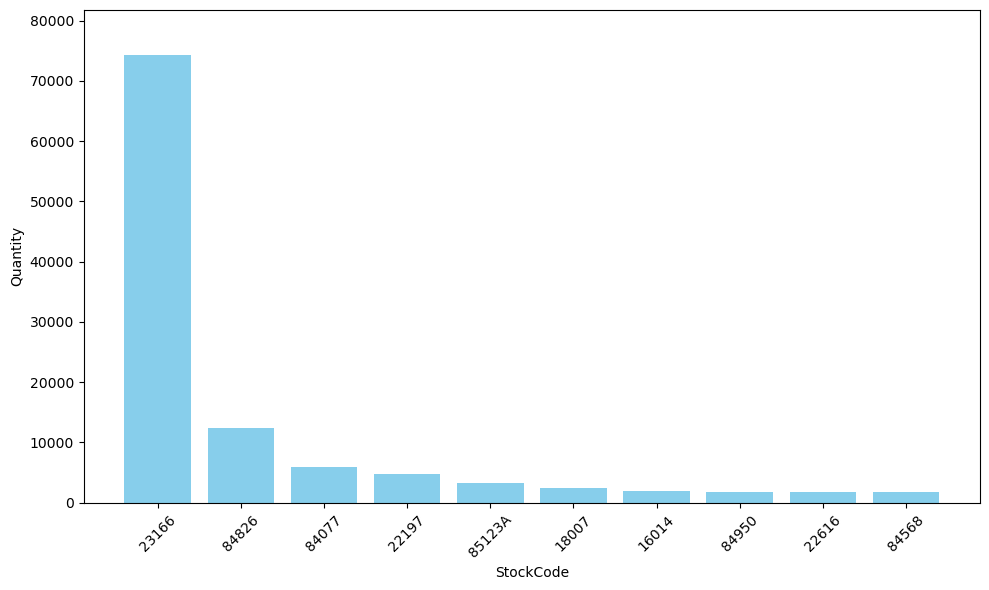

In [810]:
data = pd.DataFrame({
    'StockCode' : top_5_df_UK.index,
    'Quantity' : top_5_df_UK.values
})
x_values = top_5_df_UK.index
y_values = top_5_df_UK.values
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

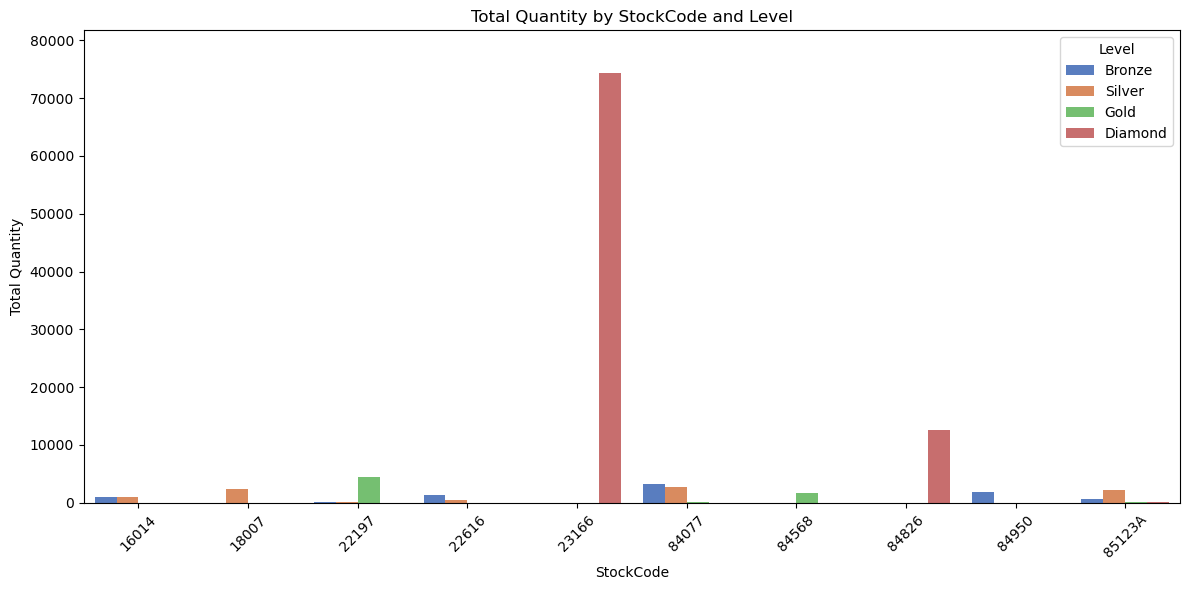

In [811]:
level_quantity_sum = df_UK_top5.groupby(['StockCode', 'Level'])['Quantity'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=level_quantity_sum, x='StockCode', y='Quantity', hue='Level', palette='muted', estimator=sum,hue_order = order)
plt.xlabel('StockCode')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by StockCode and Level')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

In [799]:
df_UK_B = df_UK[df_UK['Level'] == 'Bronze']
df_UK_B

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
324,12747.0,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,12/5/2010 15:38,2.55,United Kingdom,0.029096,Bronze
375,12826.0,538107,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,12/9/2010 15:21,2.95,United Kingdom,0.032279,Bronze
378,12829.0,538870,22794,SWEETHEART WIRE MAGAZINE RACK,2,12/14/2010 14:54,7.95,United Kingdom,0.036535,Bronze
386,12838.0,536415,22952,60 CAKE CASES VINTAGE CHRISTMAS,10,12/1/2010 11:57,0.55,United Kingdom,0.014779,Bronze
387,12839.0,537648,21557,SET OF 6 FUNKY BEAKERS,6,12/7/2010 15:48,2.95,United Kingdom,0.050598,Bronze
...,...,...,...,...,...,...,...,...,...,...
4280,18239.0,536833,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/2/2010 17:48,2.95,United Kingdom,0.016342,Bronze
4284,18245.0,539477,21992,VINTAGE PAISLEY STATIONERY SET,6,12/19/2010 14:58,2.95,United Kingdom,0.070459,Bronze
4293,18259.0,537813,22694,WICKER STAR,6,12/8/2010 13:38,2.10,United Kingdom,0.027234,Bronze
4294,18260.0,539315,79321,CHILLI LIGHTS,8,12/16/2010 18:23,4.95,United Kingdom,0.062088,Bronze


In [800]:
df_UK_S = df_UK[df_UK['Level'] == 'Silver']
df_UK_G = df_UK[df_UK['Level'] == 'Gold']
df_UK_D = df_UK[df_UK['Level'] == 'Diamond']

In [769]:
df_ge = df[df['Country'] == 'Germany']
df_ge

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
64,12426.0,554985,20665,RED RETROSPOT PURSE,6,5/29/2011 12:26,2.95,Germany,0.485062,Gold
65,12427.0,536861,22149,FELTCRAFT 6 FLOWER FRIENDS,6,12/3/2010 10:44,2.10,Germany,0.009802,Bronze
99,12468.0,542371,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,12,1/27/2011 13:29,2.95,Germany,0.157557,Silver
100,12471.0,C536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,12/2/2010 10:37,8.50,Germany,0.077426,Bronze
101,12472.0,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,Germany,0.045493,Bronze
...,...,...,...,...,...,...,...,...,...,...
1079,13814.0,561194,22417,PACK OF 60 SPACEBOY CAKE CASES,24,7/25/2011 13:54,0.55,Germany,0.639760,Gold
1080,13815.0,542080,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,6,1/25/2011 12:16,3.75,Germany,0.168253,Silver
1081,13816.0,569861,22629,SPACEBOY LUNCH BOX,12,10/6/2011 14:37,1.95,Germany,0.832054,Gold
1082,13817.0,539946,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,12/23/2010 11:46,2.95,Germany,0.061581,Bronze


In [770]:
df_ge[df_ge['Quantity']<0]

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
100,12471.0,C536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,12/2/2010 10:37,8.50,Germany,0.077426,Bronze
101,12472.0,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,Germany,0.045493,Bronze
103,12474.0,C537333,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-4,12/6/2010 12:00,8.50,Germany,0.160794,Silver
105,12476.0,C538642,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-1,12/13/2010 14:37,8.50,Germany,0.066146,Bronze
106,12477.0,C542798,21531,RED RETROSPOT SUGAR JAM BOWL,-1,2/1/2011 11:09,2.55,Germany,0.255427,Silver
246,12649.0,C538084,22860,EASTER TIN CHICKS PINK DAISY,-6,12/9/2010 14:42,1.65,Germany,0.434651,Gold
259,12665.0,C540850,21231,SWEETHEART CERAMIC TRINKET BOX,-1,1/12/2011 9:41,1.25,Germany,0.131831,Silver


In [771]:
print(df_ge['Level'].value_counts())

Level
Gold       37
Silver     33
Bronze     18
Diamond     5
Name: count, dtype: int64


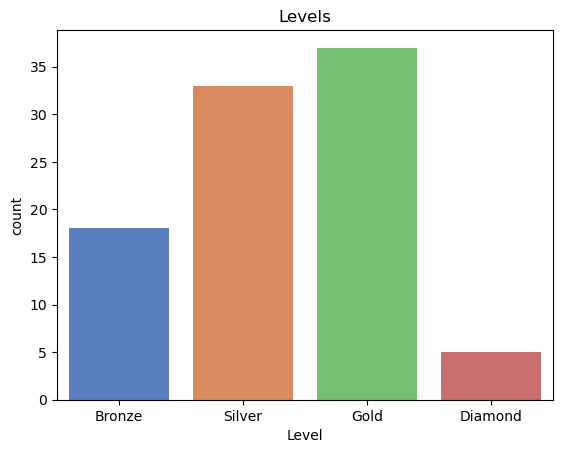

In [772]:
sns.countplot(x='Level', data=df_ge, palette='muted', order=order)
plt.title('Levels')
plt.show()

In [773]:
df_ge

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
64,12426.0,554985,20665,RED RETROSPOT PURSE,6,5/29/2011 12:26,2.95,Germany,0.485062,Gold
65,12427.0,536861,22149,FELTCRAFT 6 FLOWER FRIENDS,6,12/3/2010 10:44,2.10,Germany,0.009802,Bronze
99,12468.0,542371,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,12,1/27/2011 13:29,2.95,Germany,0.157557,Silver
100,12471.0,C536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,12/2/2010 10:37,8.50,Germany,0.077426,Bronze
101,12472.0,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,Germany,0.045493,Bronze
...,...,...,...,...,...,...,...,...,...,...
1079,13814.0,561194,22417,PACK OF 60 SPACEBOY CAKE CASES,24,7/25/2011 13:54,0.55,Germany,0.639760,Gold
1080,13815.0,542080,84997B,RED 3 PIECE RETROSPOT CUTLERY SET,6,1/25/2011 12:16,3.75,Germany,0.168253,Silver
1081,13816.0,569861,22629,SPACEBOY LUNCH BOX,12,10/6/2011 14:37,1.95,Germany,0.832054,Gold
1082,13817.0,539946,22326,ROUND SNACK BOXES SET OF4 WOODLAND,6,12/23/2010 11:46,2.95,Germany,0.061581,Bronze


In [812]:
top_5_df_GE = df_ge[df_ge['StockCode'] != 'POST'][df_ge['StockCode'] != 'D'][df_ge['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_5_df_GE

C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\3108964284.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_GE = df_ge[df_ge['StockCode'] != 'POST'][df_ge['StockCode'] != 'D'][df_ge['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\3108964284.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_GE = df_ge[df_ge['StockCode'] != 'POST'][df_ge['StockCode'] != 'D'][df_ge['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)


StockCode
10135     200
22632      96
23310      72
22858      48
85014B     48
22834      48
20719      40
21498      25
21212      24
22961      24
Name: Quantity, dtype: int64

In [813]:
df_GE_top5 = df_ge[df_ge['StockCode'].isin(top_5_df_GE.index)]
df_GE_top5


,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
102,12473.0,555162,21498,RED RETROSPOT WRAP,25,6/1/2011 10:15,0.42,Germany,0.503642,Gold
104,12475.0,571308,23310,BUBBLEGUM RING ASSORTED,72,10/17/2011 10:10,0.42,Germany,0.864258,Gold
108,12479.0,579152,21212,PACK OF 72 RETROSPOT CAKE CASES,24,11/28/2011 13:26,0.55,Germany,0.973659,Diamond
120,12497.0,567298,22632,HAND WARMER RED RETROSPOT,96,9/19/2011 12:29,1.85,Germany,0.784787,Gold
122,12500.0,540553,22858,EASTER TIN KEEPSAKE,48,1/10/2011 9:48,1.65,Germany,0.115757,Silver
196,12590.0,552978,85014B,RED RETROSPOT UMBRELLA,48,5/12/2011 14:46,4.95,Germany,0.446867,Gold
198,12592.0,552649,20719,WOODLAND CHARLOTTE BAG,30,5/10/2011 13:44,0.85,Germany,0.430793,Gold
206,12601.0,540769,22961,JAM MAKING SET PRINTED,12,1/11/2011 10:38,1.45,Germany,0.113281,Silver
232,12633.0,544933,10135,COLOURING PENCILS BROWN TUBE,200,2/25/2011 8:44,1.06,Germany,0.247597,Silver
251,12654.0,544302,20719,WOODLAND CHARLOTTE BAG,10,2/17/2011 13:16,0.85,Germany,0.213794,Silver


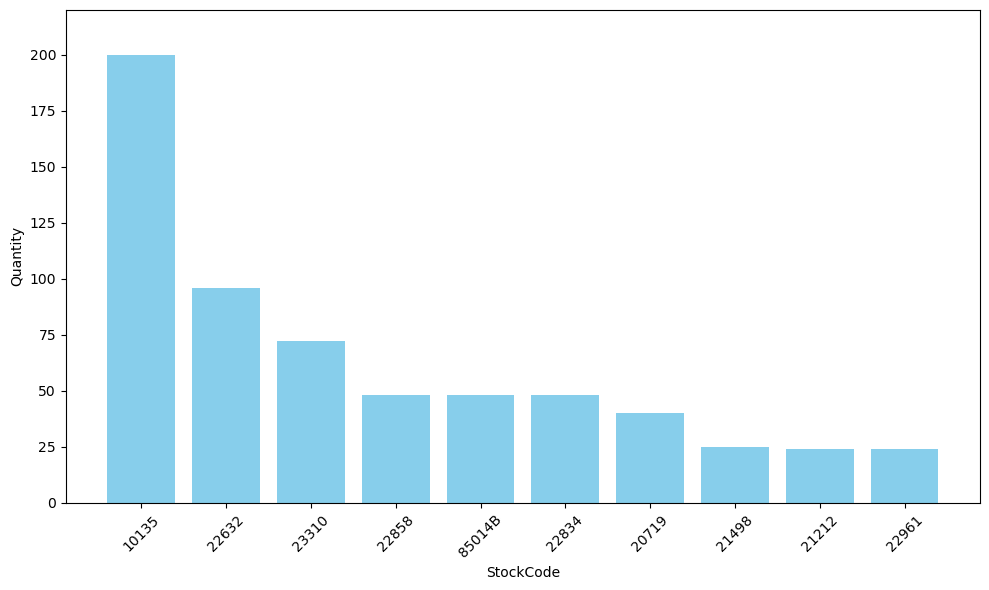

In [814]:
x_values = top_5_df_GE.index
y_values = top_5_df_GE.values
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

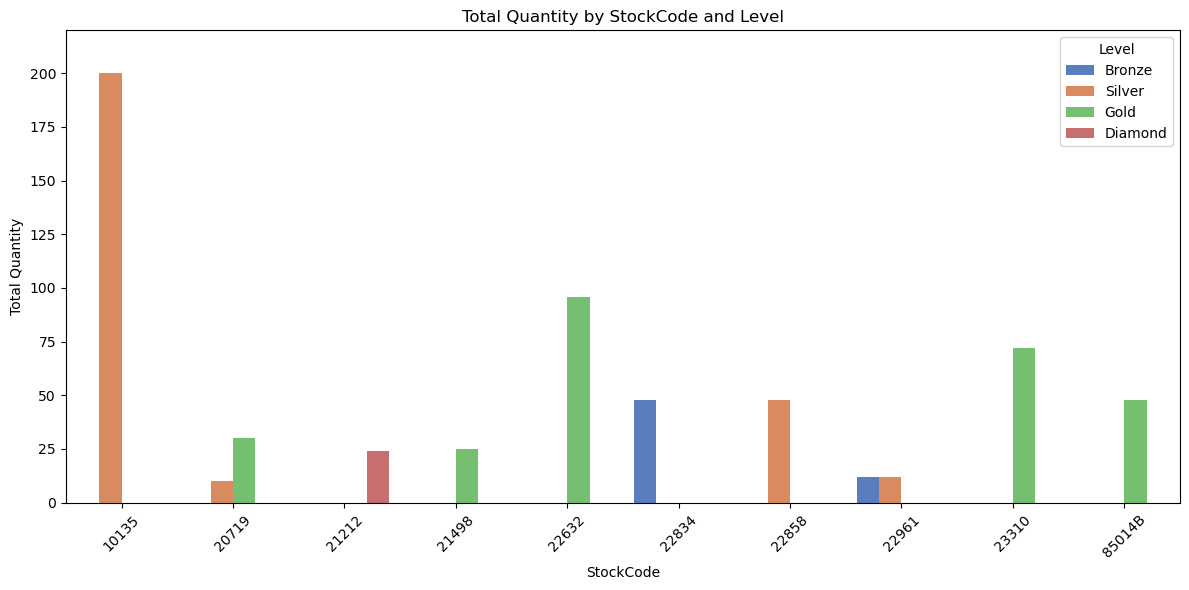

In [815]:
level_quantity_sum1 = df_GE_top5.groupby(['StockCode', 'Level'])['Quantity'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=level_quantity_sum1, x='StockCode', y='Quantity', hue='Level', palette='muted',hue_order = order, estimator=sum)
plt.xlabel('StockCode')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by StockCode and Level')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

In [778]:
df_FR = df[df['Country'] =='France']
display(df_FR)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
53,12413.0,540365,22748,POPPY'S PLAYHOUSE KITCHEN,6,1/6/2011 16:12,2.10,France,0.102564,Bronze
75,12437.0,540972,22236,CAKE STAND 3 TIER MAGIC GARDEN,12,1/12/2011 14:13,10.95,France,0.129823,Silver
77,12441.0,537693,22710,WRAP I LOVE LONDON,25,12/8/2010 10:45,0.42,France,0.020484,Bronze
113,12488.0,568137,22175,PINK OWL SOFT TOY,6,9/25/2011 10:34,2.95,France,0.808415,Gold
114,12489.0,540463,POST,POSTAGE,2,1/7/2011 13:13,18.00,France,0.101477,Bronze
...,...,...,...,...,...,...,...,...,...,...
316,12734.0,539829,82613D,METAL SIGN CUPCAKE SINGLE HOOK,20,12/22/2010 12:47,0.42,France,0.056847,Bronze
317,12735.0,540351,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,12,1/6/2011 14:26,1.45,France,0.100283,Bronze
318,12736.0,540688,POST,POSTAGE,5,1/11/2011 7:57,18.00,France,0.110495,Silver
321,12740.0,570030,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,10/7/2011 10:44,0.55,France,0.834324,Gold


In [779]:
print(df_FR['Level'].value_counts())

Level
Gold       41
Silver     25
Bronze     19
Diamond     2
Name: count, dtype: int64


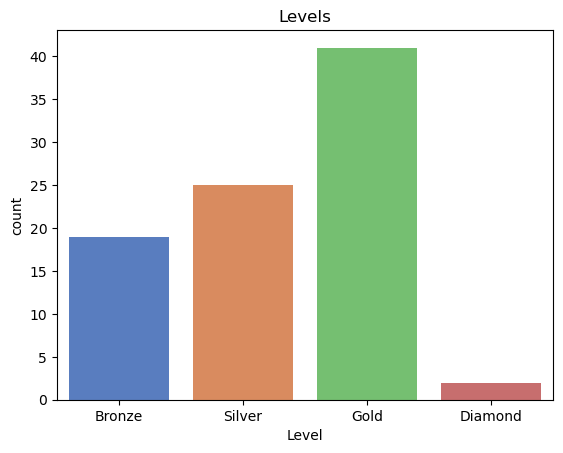

In [780]:
sns.countplot(x='Level', data=df_FR, palette='muted', order=order)
plt.title('Levels')
plt.show()

In [816]:
top_5_df_FR = df_FR[df_FR['StockCode'] != 'POST'][df_FR['StockCode'] != 'D'][df_FR['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_5_df_FR

C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\3347511969.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_FR = df_FR[df_FR['StockCode'] != 'POST'][df_FR['StockCode'] != 'D'][df_FR['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\3347511969.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_FR = df_FR[df_FR['StockCode'] != 'POST'][df_FR['StockCode'] != 'D'][df_FR['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)


StockCode
22264    192
21195     60
21731     36
23084     36
20725     30
22710     25
21212     24
21977     24
22728     24
22555     24
Name: Quantity, dtype: int64

In [817]:
df_FR_top5 = df_FR[df_FR['StockCode'].isin(top_5_df_FR.index)]
df_FR_top5



,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
77,12441.0,537693,22710,WRAP I LOVE LONDON,25,12/8/2010 10:45,0.42,France,0.020484,Bronze
115,12490.0,541120,21195,PINK HONEYCOMB PAPER BALL,48,1/14/2011 9:13,0.65,France,0.146135,Silver
118,12493.0,554826,20725,LUNCH BAG RED RETROSPOT,10,5/26/2011 14:53,1.65,France,0.474539,Gold
172,12562.0,554648,23084,RABBIT NIGHT LIGHT,24,5/25/2011 12:44,1.79,France,0.489929,Gold
189,12583.0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,France,0.026863,Bronze
256,12660.0,579153,22555,PLASTERS IN TIN STRONGMAN,12,11/28/2011 13:26,1.65,France,0.972637,Diamond
263,12670.0,550827,20725,LUNCH BAG RED RETROSPOT,20,4/21/2011 10:16,1.65,France,0.390468,Silver
279,12690.0,553566,23084,RABBIT NIGHT LIGHT,12,5/18/2011 9:09,2.08,France,0.453494,Gold
280,12691.0,539435,21731,RED TOADSTOOL LED NIGHT LIGHT,36,12/17/2010 14:46,1.65,France,0.047733,Bronze
285,12700.0,552315,22555,PLASTERS IN TIN STRONGMAN,12,5/8/2011 16:10,1.65,France,0.456782,Gold


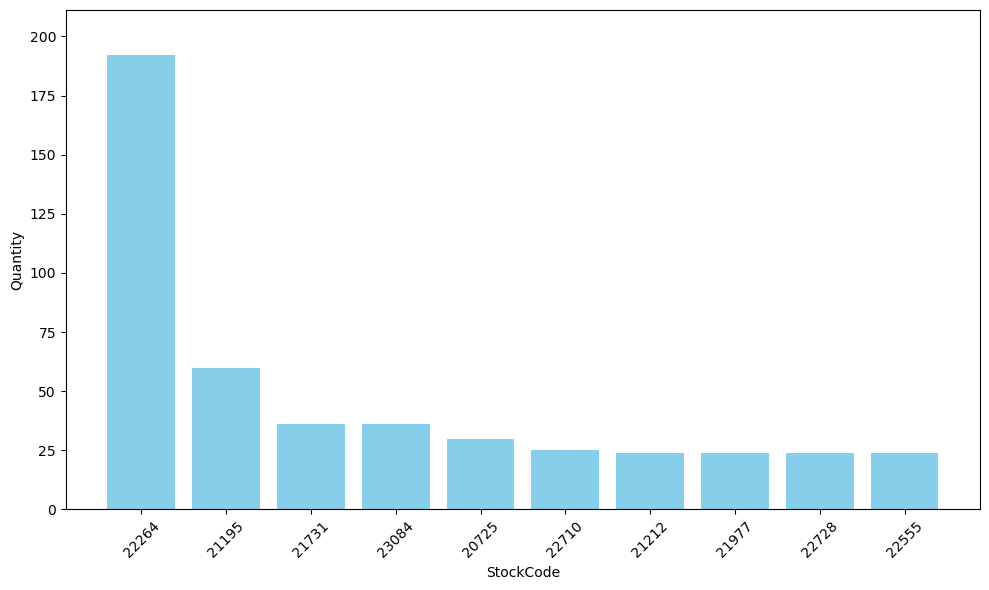

In [818]:
x_values = top_5_df_FR.index
y_values = top_5_df_FR.values
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

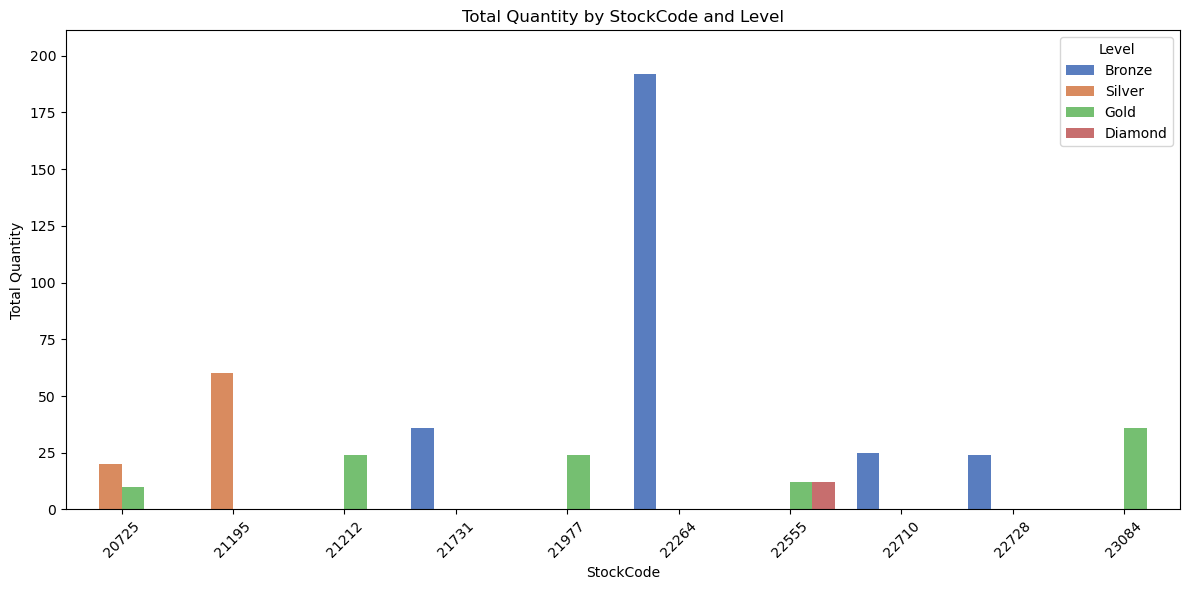

In [819]:
level_quantity_sum2 = df_FR_top5.groupby(['StockCode', 'Level'])['Quantity'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=level_quantity_sum2, x='StockCode', y='Quantity', hue='Level', hue_order = order, palette='muted', estimator=sum)
plt.xlabel('StockCode')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by StockCode and Level')
plt.xticks(rotation=45)
plt.ylim(0, max(y_values) * 1.1)
plt.tight_layout()
plt.show()

In [785]:
df_C = df[df['Quantity']<0]
df_C

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
72,12434.0,C538723,22333,RETROSPOT PARTY BAG + STICKER SET,-7,12/14/2010 11:12,1.65,Australia,0.313674,Silver
100,12471.0,C536622,22752,SET 7 BABUSHKA NESTING BOXES,-2,12/2/2010 10:37,8.50,Germany,0.077426,Bronze
101,12472.0,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,Germany,0.045493,Bronze
103,12474.0,C537333,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-4,12/6/2010 12:00,8.50,Germany,0.160794,Silver
105,12476.0,C538642,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-1,12/13/2010 14:37,8.50,Germany,0.066146,Bronze
...,...,...,...,...,...,...,...,...,...,...
4228,18172.0,C544436,22556,PLASTERS IN TIN CIRCUS PARADE,-3,2/18/2011 16:52,1.65,United Kingdom,0.255335,Silver
4245,18193.0,C537821,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-3,12/8/2010 14:20,6.95,United Kingdom,0.559737,Gold
4269,18225.0,C536855,21527,RED RETROSPOT TRADITIONAL TEAPOT,-4,12/3/2010 10:11,7.95,United Kingdom,0.056259,Bronze
4274,18230.0,C538089,21906,PHARMACIE FIRST AID TIN,-1,12/9/2010 14:47,6.75,United Kingdom,0.202062,Silver


In [820]:
top_5_df_C = df_C[df_C['StockCode'] != 'POST'][df_C['StockCode'] != 'D'][df_C['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=True).head(10)
top_5_df_C

C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\754251587.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_C = df_C[df_C['StockCode'] != 'POST'][df_C['StockCode'] != 'D'][df_C['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=True).head(10)
C:\Users\kangh\AppData\Local\Temp\ipykernel_26468\754251587.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_df_C = df_C[df_C['StockCode'] != 'POST'][df_C['StockCode'] != 'D'][df_C['StockCode'] != 'S'].groupby('StockCode')['Quantity'].sum().sort_values(ascending=True).head(10)


StockCode
84347    -9360
15036     -600
85232B    -243
85071A    -150
84826      -60
22153      -48
22602      -36
84032B     -36
21212      -30
21914      -24
Name: Quantity, dtype: int64

In [825]:
df_C_top5 = df_C[df_C['StockCode'].isin(top_5_df_C.index)]
df_C_top5



,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
405,12865.0,C538971,22153,ANGEL DECORATION STARS ON DRESS,-48,12/15/2010 11:39,0.42,Austria,0.682588,Gold
433,12908.0,C542693,15036,ASSORTED COLOURS SILK FAN,-600,1/31/2011 12:36,0.65,United Kingdom,0.171687,Silver
505,13008.0,C538702,84826,ASSTD DESIGN 3D PAPER STICKERS,-60,12/14/2010 10:28,0.85,United Kingdom,0.135579,Silver
691,13266.0,C539068,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,-36,12/15/2010 16:56,1.25,United Kingdom,0.330861,Silver
979,13672.0,C540634,85232B,SET OF 3 BABUSHKA STACKING TINS,-3,1/10/2011 12:02,4.95,United Kingdom,0.111603,Silver
1897,14952.0,C537756,21914,BLUE HARMONICA IN BOX,-24,12/8/2010 11:33,1.25,United Kingdom,0.050358,Bronze
2068,15179.0,C538362,21212,PACK OF 72 RETROSPOT CAKE CASES,-30,12/10/2010 17:05,0.55,United Kingdom,0.157791,Silver
2559,15838.0,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,United Kingdom,0.037994,Bronze
3664,17389.0,C540109,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,-150,1/4/2011 17:12,2.95,United Kingdom,0.142310,Silver
3674,17404.0,C538847,85232B,SET OF 3 BABUSHKA STACKING TINS,-240,12/14/2010 13:27,4.95,Sweden,0.058074,Bronze


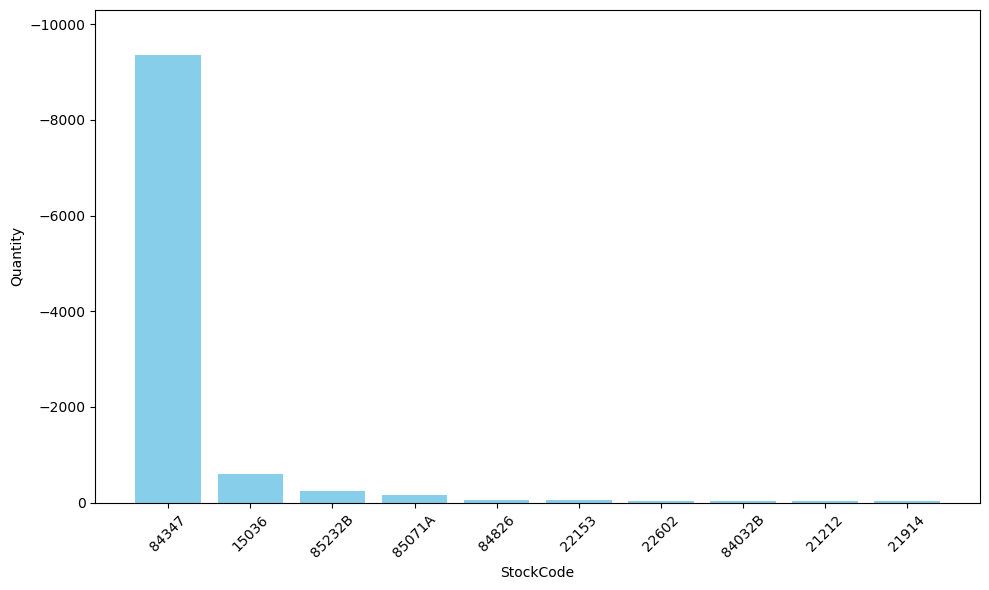

In [821]:
x_values = top_5_df_C.index
y_values = top_5_df_C.values
plt.figure(figsize=(10,6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('StockCode')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.ylim(0, min(y_values) * 1.1)
plt.tight_layout()
plt.show()

In [824]:
df[df['StockCode'] == '84347']

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Score,Level
155,12540.0,538525,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,36,12/13/2010 9:39,2.55,Spain,0.085097,Bronze
2559,15838.0,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,United Kingdom,0.037994,Bronze
3554,17232.0,578794,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,12,11/25/2011 12:24,2.55,United Kingdom,0.968483,Diamond


---------------------------------------------

### 데이터 분석 결과 
처음 데이터에서 각각 이상치를 제거한 후, groupby로 CustomerID로 묶은 데이터를 도출한 결과는 다음과 같다.

<img src="./images/1.png" width="800">

전체 회원의 등급 분포는 다음과 같이 나온다.  
Silver 등급과 Gold 등급이 가장 높게 나타나고, Diamond 등급이 가장 낮게 나타남을 확인할 수 있다.

지역별 데이터를 도출한 결과는 다음과 같다.

<img src="./images/2.png" width="800" >

지역별 회원의 등급을 확인한 결과, United Kingdom의 표본이 가장 두드러지게 많이 나타났고,  
그 다음으로 확인이 되는 지역은 Germany와 France로 나타났다.  

나머지 지역들은 회원의 표본값 자체가 너무 작아 더 자세히 살펴볼 필요가 없다고 여겨, 위 3개의 지역을 따로 도출했다.

가장 표본이 많은 United Kingdom(이하 영국)의 회원별 등급은 다음과 같이 나타났다.

<img src="./images/3.png" width="800">

영국의 회원 표본  
3816 / 4225 * 100 = 90.31952662721  

위 그래프는 총 국가별 회원의 등급의 양상과 크게 다르지 않다. 
그 이유는 영국회원의 표본이 3816명이고 전체 표본의 크기 4225명으로,   
전체 회원의 90퍼센트가 영국회원이기 때문이다.

영국회원들은 어떤 물건을 제일 많이 사는지 확인하기 위해 영국 국가의 StockCode(이하 상품)를 시각화 하였고 다음과 같다.

<img src="./images/4.png" width="800">

상품 그래프의 표본의 다양성이 많아 어떤 값이 가장 큰지 확인이 되지 않아, 이 중 가장 많이 구매하는 10개의 항목만 따로 추출했다.

<img src="./images/5.png" width="800">
<img src="./images/11.png" width="800">
위의 각 상품 코드 중 상위 5개의 설명을 확인하면 다음과 같다

- 23166 : 세라믹 뚜껑 보관용 항아리
- 84826 : 다양한 디자인의 3D 종이 스티커
- 84077 : 제 2차 세계 대전 비행기 모형
- 22197 : 팝콘 홀더
- 85123A : 흰색의 행잉 하트 티라이트 홀더  

이 플랫폼은 영국 회원들이 가장 많은 비중을 차지해서, 플랫폼의 위치는 영국에 있을 가능성이 가장 높아 보인다.  
Diamond 회원의 구매가 특히 많이 구매하는 것으로 나타났다.  
그에반해, Bronze, Silver, Gold 등급의 회원들은 Diamond에 비해 상대적으로 덜 구매하는 것으로 보인다.  


--------------------------------

Germany(이하 독일)의 표본은 다음과 같이 나타났다.

<img src="./images/6.png" width="800">

대체적으로 균등한 수의 표본임을 알 수 있다.  

독일 사람들이 이 플랫폼에서 가장 많이 구매한 10개의 항목을 나타내면 다음과 같다.  

<img src="./images/7.png" width="800">
<img src="./images/12.png" width="800">

위의 각 상품 코드중 상위 5개의 설명을 확인하면 다음과 같다.

- 10135 : 갈색 튜브에 담긴 색연필 세트
- 22632 : 빨간색 레트로 스팟 패턴의 핸드워머
- 22310 : 다양한 종류의 버블검 링
- 22858 : 부활절 기념품 용도의 틴박스
- 85014B : 빨간색 레트로 스팟 패턴의 우산


위 그래프를 보면, 독일 사람들 중 Silver 등급 회원들과 Gold 등급 회원들이 대부분의 상품을 구매한 것으로 보인다.   

독일 회원의 표본 크기  
87 / 4225 * 100 = 2.05917159  

하지만 표본의 비율이 2.1%로 낮기에, 경향만 파악하였다.  

--------------------------------

France(이하 프랑스)의 표본은 다음과 같이 나타났다.  

<img src="./images/8.png" width="800">

Silver 와 Gold 회원의 수가 제일 많고 Diamond와 Bronze회원의 수가 적은 것을 알 수 있다.

프랑스 사람들이 이 플랫폼에서 가장 많이 구매한 10개의 항목을 나타내면 다음과 같다.

<img src="./images/9.png" width="800">
<img src="./images/13.png" width="800">

위의 각 상품 코드중 상위 5개의 설명을 확인하면 다음과 같다.

- 22264 : 흰색 토끼 모양의 펠트 농장 동물
- 21195 : 분홍색 꿀벌집 모양의 종이 볼
- 21731 : 빨간색 독버섯 모양의 LED 나무 등
- 23084 : 토끼 모양의 LED 나무 등
- 20725 : 빨간색 레트로 스팟 패턴의 점심 가방

  
위 상품들은 주로 Bronze와 Silver 고객들이 많이 구매한 것을 확인할 수 있었다.

프랑스 회원의 표본크기  
87 / 4225 * 100 = 2.059171597  
하지만, 마찬가지로 전체 표본 수의 비율이 2.1%로 매우 낮기에, 경향만 파악하였다.

-----------------------------

전체 국가에서 환불한 목록 중 가장 많이 환불한 목록 10개를 나열하였다.

<img src="./images/10.png" width="800">

그 중 상위 10개의 상품 코드는 다음과 같다.

- 84347 : 회전하는 은색 천사 티라이트 홀더
- 15036 : 다양한 색상의 실크 부채
- 85232B : 3개의 바부샤카 스타킹 틴 세트
- 85071A : 파란색 찰리와 로라 개인용 도어 사인
- 84826 : 다양한 디자인의 3D 종이 스티커

가장 많이 환불된 제품은 잼을 만들기 위한 세트로 그 수량은 9360개이다.

### 마케팅 전략

🚩 Recency(최근성):  
- Diamond 등급 회원을 위한 프리미엄 상품:
>Diamond 등급 회원들은 이미 높은 충성도를 보이고 있으므로, 최근 구매한 Diamond 등급 회원들을 대상으로  
>특별한 프리미엄 상품을 제공합니다. 예를 들어, 고가의 한정판 상품이나 VIP 이벤트 초대권을 제공합니다.
- Bronze 등급 회원을 위한 할인 혜택:
>Recency가 낮은 Bronze 등급 회원들에게는 할인 쿠폰이나 이벤트 참여 기회를 제공하여 다시 상점을 방문하도록 유도합니다.

  
🚩 Frequency(구매 빈도):  
- 다양한 디자인의 3D 종이 스티커와 같은 저렴하면서도 재미있는 상품을 중점적으로 홍보:
>많이 판매되는 상품 중, 저렴한 상품들을 주기적으로 구매하는 고객들을 유치하기 위해  
>다양한 디자인의 3D 종이 스티커와 같은 상품을 중점적으로 홍보합니다.
- 누적 구매액에 따른 리워드 프로그램 도입:  
>누적 구매액에 따라 등급을 나누고, 높은 등급에 도달한 고객들에게는 추가 혜택을 제공합니다.  
>이로써 구매 빈도를 높이고자 합니다.
 
🚩 Monetary (구매 금액):
- 프리미엄 상품에 대한 할인 혜택 제공:
> Diamond 등급 회원을 중심으로 고가의 상품에 대한 할인 혜택을 제공하여 더 많은 금액을 지출하도록 유도합니다.
- 상품 번들링 및 크로스 세일:
> 고객들이 더 많은 상품을 구매하도록 유도하기 위해 상품 번들링이나 크로스 세일을 통해 추가 구매를 유도합니다.

🚩 Refund(환불):
- 환불 제품에 대해 제품성 검토:
> 특정 상품(특히 84347(회전하는 은색 천사 티라이트 홀더))에 대해 높은 환불수치를 나타내는 제품에 대해 제품성 재검토가 시급합니다.
> 어떤 부분이 문제인지 확인하고 이를 보완하면 이 환불수치를 낮출 수 있습니다.
- 서비스 향상:
> 전체적으로 환불율이 높게 나타나는 상품에 대해 원인을 파악하고, 고객의 니즈를 파악하고 그에 따른 서비스를 제공한다면
> 환불수치를 낮출 수 있습니다.


위 마케팅 전략을 통해 Recency와 Frequency, Montetary 점수를 모두 향상시키고, 이에 따라 고객의 충성도를 높이며 매출을 증대시킬 수 있을것으로 예측됩니다.
